In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 수치형 2변수 : 두 변수간의 관련성 측정

In [105]:
Stereo = pd.read_excel(r'/Users/siwoolchoi/Desktop/siwooly/대학원/통계와확률/data/Stereo.xlsx', header=0, index_col='Week')

Stereo

,No. of Commercials,Sales Volume
Week,,
1,2,50
2,5,57
3,1,41
4,3,54
5,4,54
6,1,38
7,5,63
8,3,48
9,4,59


산점도(scatterplot)와 추세선(regplot)

<Axes: xlabel='No. of Commercials', ylabel='Sales Volume'>

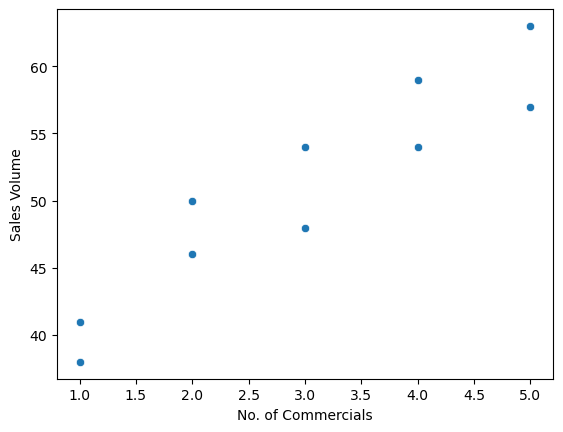

In [106]:
sns.scatterplot(x='No. of Commercials',
                y='Sales Volume',
                data=Stereo
                )

<Axes: xlabel='No. of Commercials', ylabel='Sales Volume'>

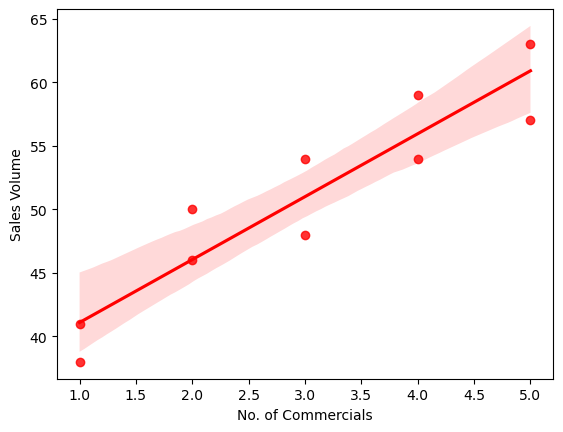

In [107]:
sns.regplot(
    x='No. of Commercials',
    y='Sales Volume',
    data=Stereo,
    color='red'
    )

<Axes: xlabel='No. of Commercials', ylabel='Sales Volume'>

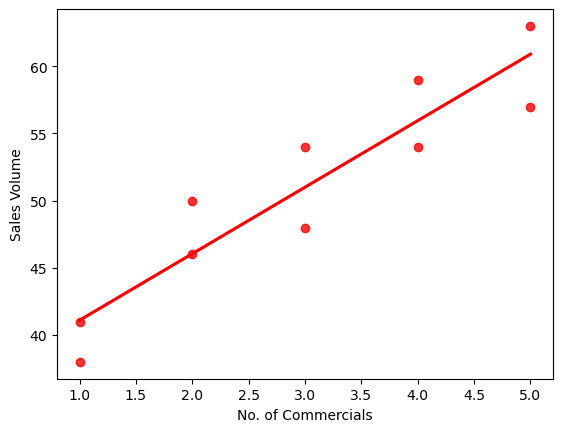

In [108]:
sns.regplot(
    x='No. of Commercials',
    y='Sales Volume',
    data=Stereo,
    ci=None,
    color='red'
    )

공분산과 상관계수

In [109]:
Stereo.rename(columns={'No. of Commercials':'x', 'Sales Volume':'y'}, inplace=True)

Stereo

,x,y
Week,,
1,2,50
2,5,57
3,1,41
4,3,54
5,4,54
6,1,38
7,5,63
8,3,48
9,4,59


In [110]:
# 두 변수, x,y의 평균을 계산

xbar = Stereo['x'].mean()
ybar = Stereo['y'].mean()

xbar.item() , ybar.item()


(3.0, 51.0)

In [111]:
# 평균을 mean 행을 만들어서 추가

Stereo.loc['mean'] = [xbar, ybar]

Stereo

,x,y
Week,,
1,2.0,50.0
2,5.0,57.0
3,1.0,41.0
4,3.0,54.0
5,4.0,54.0
6,1.0,38.0
7,5.0,63.0
8,3.0,48.0
9,4.0,59.0


In [112]:
Stereo.loc[:10, 'x-xbar'] = Stereo.loc[:10, 'x'] - xbar 

Stereo

,x,y,x-xbar
Week,,,
1,2.0,50.0,-1.0
2,5.0,57.0,2.0
3,1.0,41.0,-2.0
4,3.0,54.0,0.0
5,4.0,54.0,1.0
6,1.0,38.0,-2.0
7,5.0,63.0,2.0
8,3.0,48.0,0.0
9,4.0,59.0,1.0


In [113]:
Stereo.loc[:10, 'y-ybar'] = Stereo.loc[:10, 'y'] - ybar 

Stereo

,x,y,x-xbar,y-ybar
Week,,,,
1,2.0,50.0,-1.0,-1.0
2,5.0,57.0,2.0,6.0
3,1.0,41.0,-2.0,-10.0
4,3.0,54.0,0.0,3.0
5,4.0,54.0,1.0,3.0
6,1.0,38.0,-2.0,-13.0
7,5.0,63.0,2.0,12.0
8,3.0,48.0,0.0,-3.0
9,4.0,59.0,1.0,8.0


In [114]:
# 제곱

Stereo.loc[:10, '(x-xbar)2'] = Stereo.loc[:10, 'x-xbar']**2

Stereo

,x,y,x-xbar,y-ybar,(x-xbar)2
Week,,,,,
1,2.0,50.0,-1.0,-1.0,1.0
2,5.0,57.0,2.0,6.0,4.0
3,1.0,41.0,-2.0,-10.0,4.0
4,3.0,54.0,0.0,3.0,0.0
5,4.0,54.0,1.0,3.0,1.0
6,1.0,38.0,-2.0,-13.0,4.0
7,5.0,63.0,2.0,12.0,4.0
8,3.0,48.0,0.0,-3.0,0.0
9,4.0,59.0,1.0,8.0,1.0


In [115]:
Stereo.loc[:10, '(y-ybar)2'] = Stereo.loc[:10, 'y-ybar']**2

Stereo

,x,y,x-xbar,y-ybar,(x-xbar)2,(y-ybar)2
Week,,,,,,
1,2.0,50.0,-1.0,-1.0,1.0,1.0
2,5.0,57.0,2.0,6.0,4.0,36.0
3,1.0,41.0,-2.0,-10.0,4.0,100.0
4,3.0,54.0,0.0,3.0,0.0,9.0
5,4.0,54.0,1.0,3.0,1.0,9.0
6,1.0,38.0,-2.0,-13.0,4.0,169.0
7,5.0,63.0,2.0,12.0,4.0,144.0
8,3.0,48.0,0.0,-3.0,0.0,9.0
9,4.0,59.0,1.0,8.0,1.0,64.0


In [ ]:
n = Stereo.loc[:10].shape[0] # Tuple로 출력
n

10

표본분산 계산

In [122]:

var_x = Stereo.loc[:10, '(x-xbar)2'].sum() / (n-1)

var_y = Stereo.loc[:10, '(y-ybar)2'].sum() / (n-1)

var_x.item(), var_y.item()

(2.2222222222222223, 62.888888888888886)

**cross product 계산**

In [125]:
sum_xy = (Stereo.loc[:10, 'x-xbar'] * Stereo.loc[:10, 'y-ybar']).sum()

sum_xy.item()

99.0

In [129]:
# 공분산

cov_xy = sum_xy / (n-1)
cov_xy.item()

11.0

In [130]:
# 공분산 행렬

np.cov(Stereo.loc[:10,'x'], Stereo.loc[:10,'y'])

array([[ 2.22222222, 11.        ],
       [11.        , 62.88888889]])

In [131]:
np.cov(Stereo.loc[:10,'x'], Stereo.loc[:10,'y'])[0,1]

np.float64(11.0)

In [132]:
np.cov(Stereo.loc[:10,'x'], Stereo.loc[:10,'y'])[1,0]

np.float64(11.0)

In [133]:
np.cov(Stereo.loc[:10,'x'], Stereo.loc[:10,'y'])[0,0]

np.float64(2.2222222222222223)

In [134]:
np.cov(Stereo.loc[:10,'x'], Stereo.loc[:10,'y'])[1,1]

np.float64(62.888888888888886)

In [ ]:
Stereo = pd.read_excel(r'/Users/siwoolchoi/Desktop/siwooly/대학원/통계와확률/data/Stereo.xlsx', header=0, index_col='Week')
Stereo

,No. of Commercials,Sales Volume
Week,,
1,2,50
2,5,57
3,1,41
4,3,54
5,4,54
6,1,38
7,5,63
8,3,48
9,4,59


In [136]:
np.cov(Stereo)

array([[1152. , 1248. ,  960. , 1224. , 1200. ,  888. , 1392. , 1080. ,
        1320. , 1056. ],
       [1248. , 1352. , 1040. , 1326. , 1300. ,  962. , 1508. , 1170. ,
        1430. , 1144. ],
       [ 960. , 1040. ,  800. , 1020. , 1000. ,  740. , 1160. ,  900. ,
        1100. ,  880. ],
       [1224. , 1326. , 1020. , 1300.5, 1275. ,  943.5, 1479. , 1147.5,
        1402.5, 1122. ],
       [1200. , 1300. , 1000. , 1275. , 1250. ,  925. , 1450. , 1125. ,
        1375. , 1100. ],
       [ 888. ,  962. ,  740. ,  943.5,  925. ,  684.5, 1073. ,  832.5,
        1017.5,  814. ],
       [1392. , 1508. , 1160. , 1479. , 1450. , 1073. , 1682. , 1305. ,
        1595. , 1276. ],
       [1080. , 1170. ,  900. , 1147.5, 1125. ,  832.5, 1305. , 1012.5,
        1237.5,  990. ],
       [1320. , 1430. , 1100. , 1402.5, 1375. , 1017.5, 1595. , 1237.5,
        1512.5, 1210. ],
       [1056. , 1144. ,  880. , 1122. , 1100. ,  814. , 1276. ,  990. ,
        1210. ,  968. ]])

In [ ]:
np.cov(Stereo.T) # 데이터프레임이 column 형태로 변수값이 주어져있다면, row 형태로 바꿔준다. (전치)

array([[ 2.22222222, 11.        ],
       [11.        , 62.88888889]])

In [141]:
Stereo

,No. of Commercials,Sales Volume
Week,,
1,2,50
2,5,57
3,1,41
4,3,54
5,4,54
6,1,38
7,5,63
8,3,48
9,4,59


In [ ]:

Stereo.T

Week,1,2,3,4,5,6,7,8,9,10
No. of Commercials,2,5,1,3,4,1,5,3,4,2
Sales Volume,50,57,41,54,54,38,63,48,59,46
